# Heartbeat Sound Clustering

## Data Preprocessing


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('..\\Datasets\\HW4\\mitbih_train.csv', header=None)

df.shape

(87554, 188)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


- Convert the target feature data type from 'float' to 'int'

In [5]:
df[187] = df[187].astype(int)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(187), int64(1)
memory usage: 125.6 MB


In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


The last column (187) is the target variable of the dataset.

In [8]:
df.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

There are no missing values in the dataset

- Check the dataset for class imbalance

In [9]:
df[187].value_counts()

187
0    72471
4     6431
2     5788
1     2223
3      641
Name: count, dtype: int64

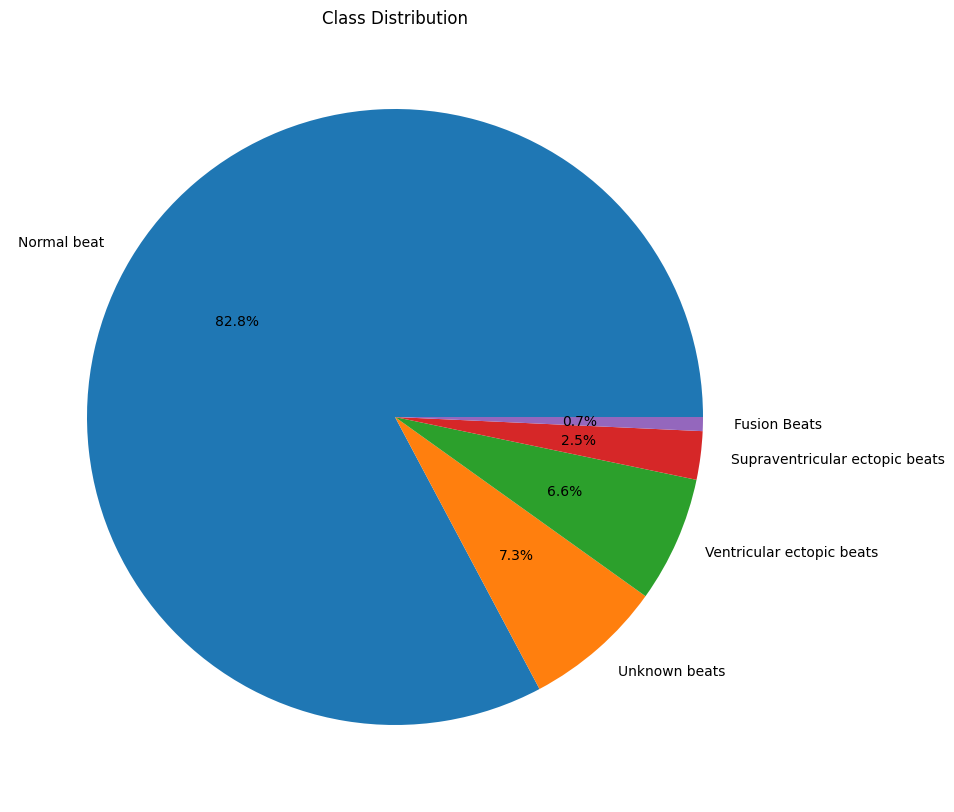

In [10]:
df[187].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    figsize=(20, 10),
    title="Class Distribution",
    labels=[
        "Normal beat",
        "Unknown beats",
        "Ventricular ectopic beats",
        "Supraventricular ectopic beats",
        "Fusion Beats",
    ],
)
plt.ylabel("")
plt.show()

- Handle class imbalance

In [11]:
df_0 = df[df[187] == 0]
df_1 = df[df[187] == 1]
df_2 = df[df[187] == 2]
df_3 = df[df[187] == 3]
df_4 = df[df[187] == 4]

df_0.shape, df_1.shape, df_2.shape, df_3.shape, df_4.shape

((72471, 188), (2223, 188), (5788, 188), (641, 188), (6431, 188))

- Oversampling

In [12]:
df_0_upsample = resample(df_0, replace=True, n_samples=20000, random_state=42)
df_1_upsample = resample(df_1, replace=True, n_samples=20000, random_state=123)
df_2_upsample = resample(df_2, replace=True, n_samples=20000, random_state=124)
df_3_upsample = resample(df_3, replace=True, n_samples=20000, random_state=125)
df_4_upsample = resample(df_4, replace=True, n_samples=20000, random_state=126)

df_0_upsample.shape, df_1_upsample.shape, df_2_upsample.shape, df_3_upsample.shape, df_4_upsample.shape

((20000, 188), (20000, 188), (20000, 188), (20000, 188), (20000, 188))

In [13]:
df_balanced = pd.concat([df_0_upsample, df_1_upsample, df_2_upsample, df_3_upsample, df_4_upsample])
df_balanced.shape

(100000, 188)

In [14]:
df_balanced[187].value_counts()

187
0    20000
1    20000
2    20000
3    20000
4    20000
Name: count, dtype: int64

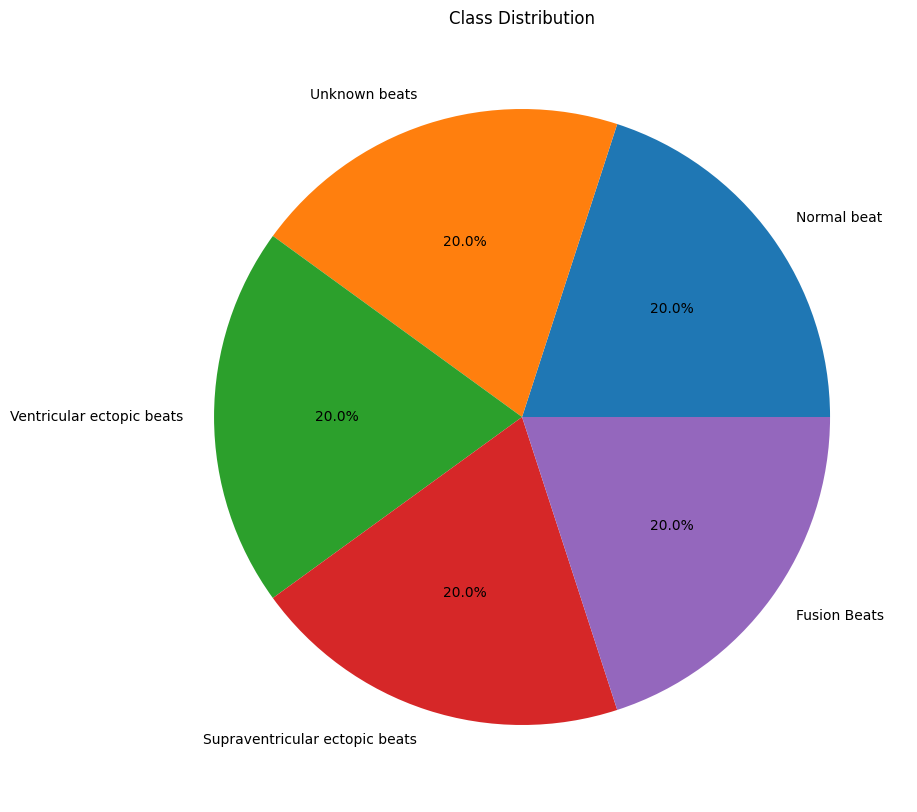

In [15]:
df_balanced[187].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    figsize=(20, 10),
    title="Class Distribution",
    labels=[
        "Normal beat",
        "Unknown beats",
        "Ventricular ectopic beats",
        "Supraventricular ectopic beats",
        "Fusion Beats",
    ],
)
plt.ylabel("")
plt.show()

In [17]:
sampled_train_df = df_balanced.groupby(df_balanced.columns[-1]).apply(lambda x: x.sample(n=5000, random_state=42)).reset_index(drop=True)

C:\Users\T.N\AppData\Local\Temp\ipykernel_7672\44723907.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_train_df = df_balanced.groupby(df_balanced.columns[-1]).apply(lambda x: x.sample(n=5000, random_state=42)).reset_index(drop=True)


- Feature Scaling (Standardization)

In [18]:
scaler = StandardScaler()
scaled_train = scaler.fit_transform(sampled_train_df)

## K-Means Clustering

- Elbow Method to determine the optimal number of clusters

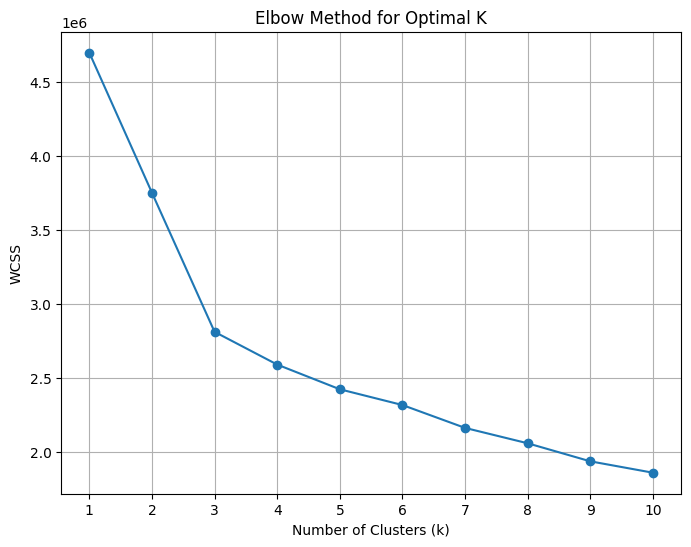

In [20]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_train)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

- K-Means

In [21]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_train)
y_kmeans = kmeans.labels_

In [25]:
y_true = sampled_train_df[187]

In [26]:
ari_kmeans = adjusted_rand_score(y_true, y_kmeans)
nmis_kmeans = normalized_mutual_info_score(y_true, y_kmeans)
print(f"Adjusted Rand Index: {ari_kmeans:.4f}")
print(f"Normalized Mutual Information: {nmis_kmeans:.4f}")

Adjusted Rand Index: 0.0733
Normalized Mutual Information: 0.1243


- K-Means with PCA

In [27]:
pca = PCA(n_components=2)
pca_train = pca.fit_transform(scaled_train)

In [28]:
k = 3
kmeans_pca = KMeans(n_clusters=k, random_state=42)
kmeans_pca.fit(pca_train)
y_kmeans_pca = kmeans_pca.labels_

In [29]:
ari_kmeans_pca = adjusted_rand_score(y_true, y_kmeans_pca)
nmis_kmeans_pca = normalized_mutual_info_score(y_true, y_kmeans_pca)
print(f"Adjusted Rand Index (PCA): {ari_kmeans_pca:.4f}")
print(f"Normalized Mutual Information (PCA): {nmis_kmeans_pca:.4f}")

Adjusted Rand Index(PCA): 0.0741
Normalized Mutual Information(PCA): 0.1249


- Evaluation of K-Means with and without PCA

In [30]:
silhouette_kmeans = silhouette_score(scaled_train, y_kmeans)
silhouette_kmeans_pca = silhouette_score(pca_train, y_kmeans_pca)
print(f"Silhouette Score for K-Means: {silhouette_kmeans}")
print(f"Silhouette Score for K-Means (PCA): {silhouette_kmeans_pca}")

dbi_kmeans = davies_bouldin_score(scaled_train, y_kmeans)
dbi_kmeans_pca = davies_bouldin_score(pca_train, y_kmeans_pca)
print(f"Davies-Bouldin Index for K-Means: {dbi_kmeans:.4f}")
print(f"Davies-Bouldin Index for K-Means (PCA): {dbi_kmeans_pca:.4f}")

wcss_kmeans = kmeans.inertia_
wcss_kmeans_pca = kmeans_pca.inertia_
print(f"Within-Cluster Sum of Squares (WCSS) for K-Means: {wcss_kmeans}")
print(f"Within-Cluster Sum of Squares (WCSS) for K-Means (PCA): {wcss_kmeans_pca}")

Silhouette Score for K-Means: 0.29294394956543374
Silhouette Score for K-Means (PCA): 0.5864711981833958
Davies-Bouldin Index for K-Means: 1.3231
Davies-Bouldin Index for K-Means (PCA): 0.5826
Within-Cluster Sum of Squares (WCSS) for K-Means: 2814077.7367076525
Within-Cluster Sum of Squares (WCSS) for K-Means (PCA): 665327.2240922125


- K-Means Visualization

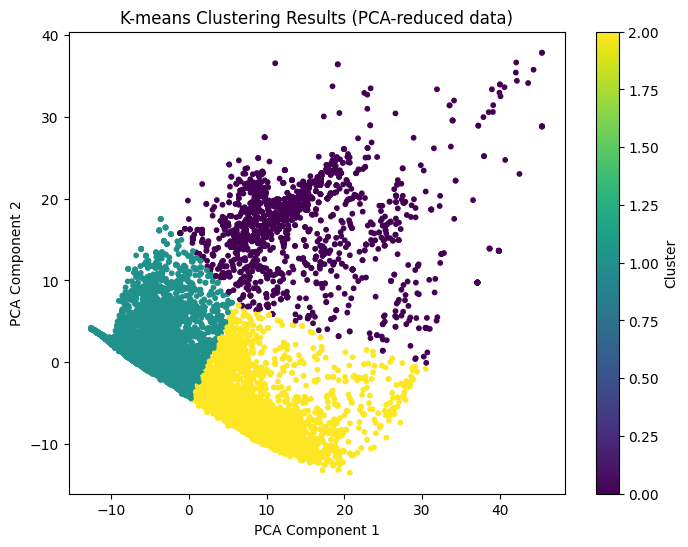

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_train[:, 0], pca_train[:, 1], c=y_kmeans_pca, cmap='viridis', s=10)
plt.title('K-means Clustering Results (PCA-reduced data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

## Hierarchical Clustering

- Agglomerative Hierarchical Clustering

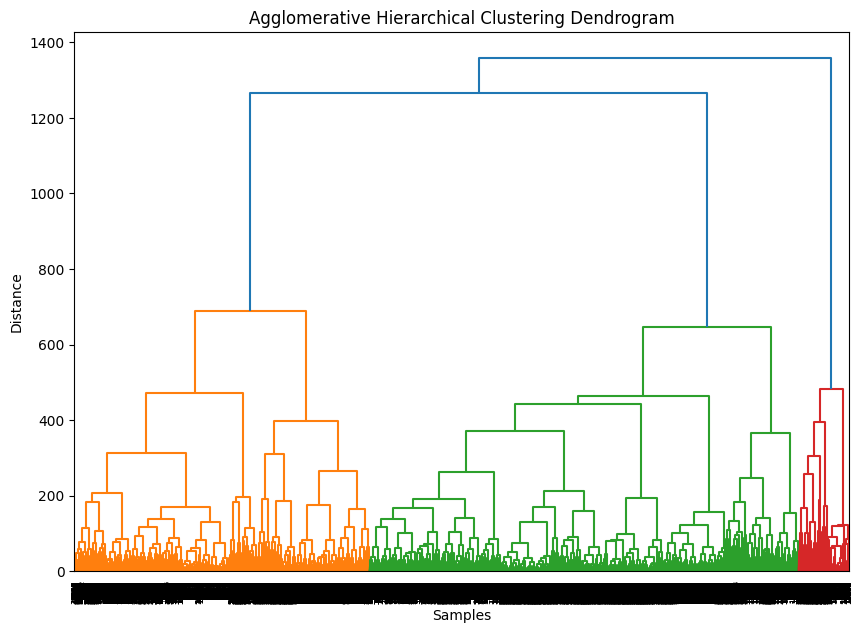

In [33]:
linked = linkage(scaled_train, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()  

In [39]:
num_clusters = 3
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters, metric='euclidean', linkage='ward')
y_agg = agg_clustering.fit_predict(scaled_train)
y_agg_pca = agg_clustering.fit_predict(pca_train)

In [40]:
def calculate_wcss(X, labels):
    wcss = 0
    for cluster in np.unique(labels):
        cluster_points = X[labels == cluster]
        centroid = cluster_points.mean(axis=0)
        wcss += np.sum((cluster_points - centroid) ** 2)
    return wcss

- Evaluation of Agglomerative Hierarchical Clustering with and without PCA

In [41]:
silhouette_agg = silhouette_score(scaled_train, y_agg)
silhouette_agg_pca = silhouette_score(pca_train, y_agg_pca)
print(f"Silhouette Score for Agglomerative Hierarchical Clustering: {silhouette_agg}")
print(f"Silhouette Score for Agglomerative Hierarchical Clustering (PCA): {silhouette_agg_pca}")

dbi_agg = davies_bouldin_score(scaled_train, y_agg)
dbi_agg_pca = davies_bouldin_score(pca_train, y_agg_pca)
print(f"Davies-Bouldin Index for Agglomerative Hierarchical Clustering: {dbi_agg:.4f}")
print(f"Davies-Bouldin Index for Agglomerative Hierarchical Clustering (PCA): {dbi_agg_pca:.4f}")

wcss_agg = calculate_wcss(scaled_train, y_agg)
wcss_agg_pca = calculate_wcss(pca_train, y_agg_pca)
print(f"Within-Cluster Sum of Squares (WCSS) for Agglomerative Hierarchical Clustering: {wcss_agg}")
print(f"Within-Cluster Sum of Squares (WCSS) for Agglomerative Hierarchical Clustering (PCA): {wcss_agg_pca}")

Silhouette Score for Agglomerative Hierarchical Clustering: 0.2283033544603558
Silhouette Score for Agglomerative Hierarchical Clustering (PCA): 0.5677531865363663
Davies-Bouldin Index for Agglomerative Hierarchical Clustering: 1.4686
Davies-Bouldin Index for Agglomerative Hierarchical Clustering (PCA): 0.6136
Within-Cluster Sum of Squares (WCSS) for Agglomerative Hierarchical Clustering: 2974175.805376893
Within-Cluster Sum of Squares (WCSS) for Agglomerative Hierarchical Clustering (PCA): 690478.8455697522


- Divisive Hierarchical Clustering

In [55]:
def divisive_clustering(X, n_clusters):
    if n_clusters == 1:
        return np.zeros(X.shape[0], dtype=int)

    kmeans = KMeans(n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)

    final_labels = np.zeros(X.shape[0], dtype=int)
    for i in range(n_clusters):
        cluster_indices = np.where(labels == i)[0]
        if len(cluster_indices) > 1:
            sub_labels = divisive_clustering(X[cluster_indices], n_clusters // 2)
            final_labels[cluster_indices] = sub_labels + (i * (n_clusters // 2))
    
    return final_labels

In [56]:
num_clusters = 3
y_div = divisive_clustering(scaled_train, num_clusters)
y_div_pca = divisive_clustering(pca_train, num_clusters)

In [57]:
silhouette_div = silhouette_score(scaled_train, y_div)
silhouette_div_pca = silhouette_score(pca_train, y_div_pca)
print(f"Silhouette Score for Divisive Hierarchical Clustering: {silhouette_div}")
print(f"Silhouette Score for Divisive Hierarchical Clustering (PCA): {silhouette_div_pca}")

dbi_div = davies_bouldin_score(scaled_train, y_div)
dbi_div_pca = davies_bouldin_score(pca_train, y_div_pca)
print(f"Davies-Bouldin Index for Divisive Hierarchical Clustering: {dbi_div:.4f}")
print(f"Davies-Bouldin Index for Divisive Hierarchical Clustering (PCA): {dbi_div_pca:.4f}")

wcss_div = calculate_wcss(scaled_train, y_div)
wcss_div_pca = calculate_wcss(pca_train, y_div_pca)
print(f"Within-Cluster Sum of Squares (WCSS) for Divisive Hierarchical Clustering: {wcss_div}")
print(f"Within-Cluster Sum of Squares (WCSS) for Divisive Hierarchical Clustering (PCA): {wcss_div_pca}")

Silhouette Score for Divisive Hierarchical Clustering: 0.29294394956543374
Silhouette Score for Divisive Hierarchical Clustering (PCA): 0.5864711981833958
Davies-Bouldin Index for Divisive Hierarchical Clustering: 1.3231
Davies-Bouldin Index for Divisive Hierarchical Clustering (PCA): 0.5826
Within-Cluster Sum of Squares (WCSS) for Divisive Hierarchical Clustering: 2814077.736707652
Within-Cluster Sum of Squares (WCSS) for Divisive Hierarchical Clustering (PCA): 665323.4103510347


- Agglomerative and Divise Hierarchical Clustering Visualization

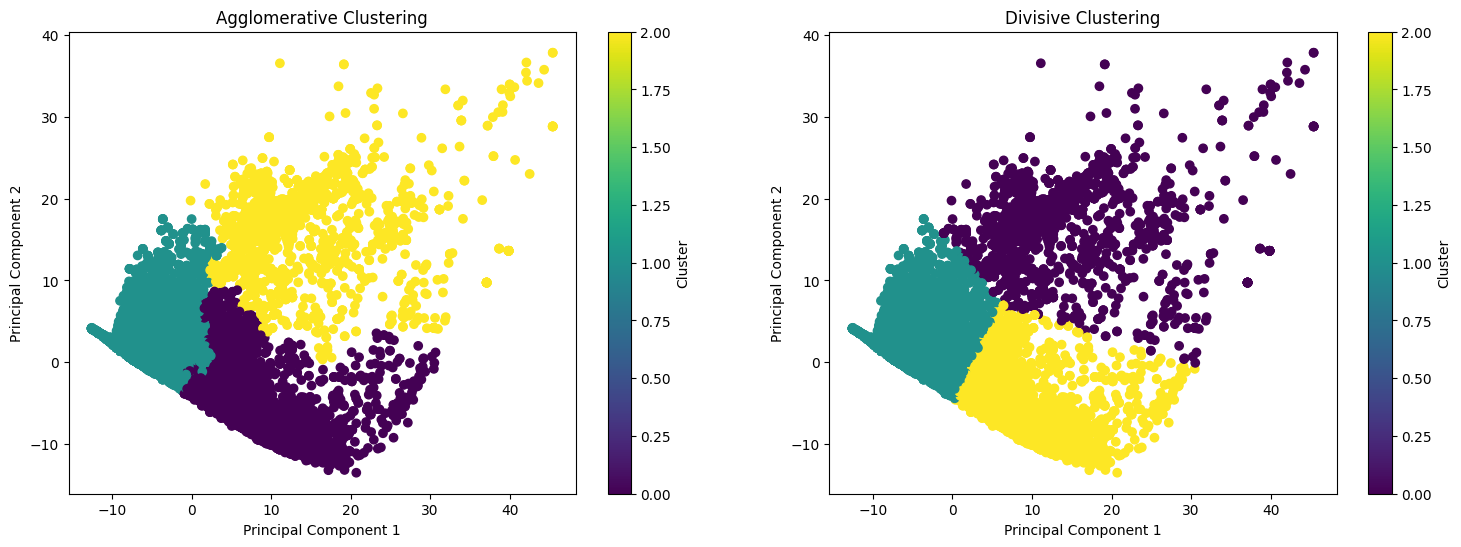

In [58]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.scatter(pca_train[:, 0], pca_train[:, 1], c=y_agg_pca, cmap='viridis', marker='o')
plt.title("Agglomerative Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")

plt.subplot(1, 2, 2)
plt.scatter(pca_train[:, 0], pca_train[:, 1], c=y_div_pca, cmap='viridis', marker='o')
plt.title("Divisive Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")

## DBSCAN

In [60]:
param_combinations = [
    {'eps': 2, 'min_samples': 5},
    {'eps': 3, 'min_samples': 5},
    {'eps': 4, 'min_samples': 5},
    {'eps': 5, 'min_samples': 5},
    {'eps': 2, 'min_samples': 10},
    {'eps': 3, 'min_samples': 10},
    {'eps': 4, 'min_samples': 10},
    {'eps': 5, 'min_samples': 10},
    {'eps': 2, 'min_samples': 20},
    {'eps': 3, 'min_samples': 20},
    {'eps': 4, 'min_samples': 20},
    {'eps': 5, 'min_samples': 20},
]

for params in param_combinations:
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    dbscan.fit(scaled_train)
    labels = dbscan.labels_
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    print(f"Parameters: eps={params['eps']}, min_samples={params['min_samples']}")
    print(f"Number of clusters: {n_clusters}")
    print(f"Number of outliers: {n_noise}")

    silhouette_dbscan = silhouette_score(scaled_train, labels)
    print(f"Silhouette Score for DBSCAN: {silhouette_dbscan}")

    dbi_dbscan = davies_bouldin_score(scaled_train, labels)
    print(f'Davies-Bouldin Index for DBSCAN: {dbi_dbscan:.4f}')

    wcss_dbscan = calculate_wcss(scaled_train, labels)
    print(f'Within-Cluster Sum of Squares (WCSS) for DBSCAN: {wcss_dbscan:.4f}')

    print("-------------------------------------------------------------")

Parameters: eps=2, min_samples=5
Number of clusters: 612
Number of outliers: 13088
Silhouette Score for DBSCAN: -0.28077851521566877
Davies-Bouldin Index for DBSCAN: 1.2790
Within-Cluster Sum of Squares (WCSS) for DBSCAN: 3038072.8769
-------------------------------------------------------------
Parameters: eps=3, min_samples=5
Number of clusters: 427
Number of outliers: 7473
Silhouette Score for DBSCAN: -0.15904290211138225
Davies-Bouldin Index for DBSCAN: 1.3425
Within-Cluster Sum of Squares (WCSS) for DBSCAN: 2346754.7289
-------------------------------------------------------------
Parameters: eps=4, min_samples=5
Number of clusters: 271
Number of outliers: 4771
Silhouette Score for DBSCAN: -0.2772365163868515
Davies-Bouldin Index for DBSCAN: 1.3351
Within-Cluster Sum of Squares (WCSS) for DBSCAN: 2760833.7565
-------------------------------------------------------------
Parameters: eps=5, min_samples=5
Number of clusters: 166
Number of outliers: 2897
Silhouette Score for DBSCAN: -

Parameters: eps=2, min_samples=5
Number of clusters: 8
Number of outliers: 41
Silhouette Score for DBSCAN (PCA): 0.6568151239823629
Davies-Bouldin Index for DBSCAN (PCA): 1.0965
Within-Cluster Sum of Squares (WCSS) for DBSCAN (PCA): 2349926.7867


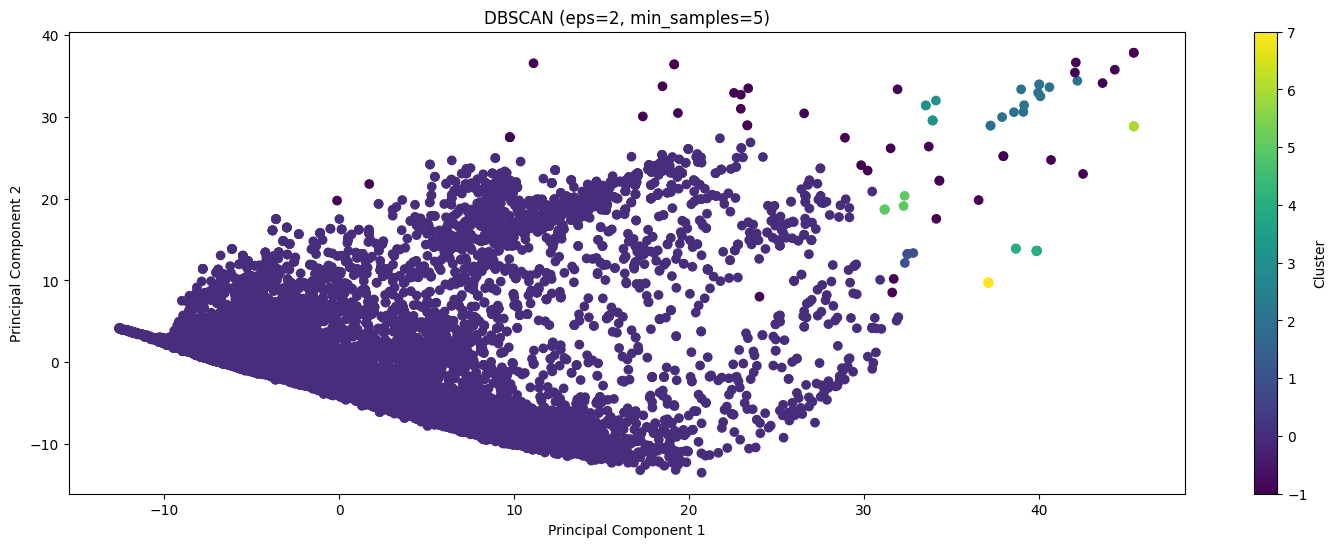

-------------------------------------------------------------
Parameters: eps=3, min_samples=5
Number of clusters: 6
Number of outliers: 14
Silhouette Score for DBSCAN (PCA): 0.6788637446748205
Davies-Bouldin Index for DBSCAN (PCA): 0.9875
Within-Cluster Sum of Squares (WCSS) for DBSCAN (PCA): 2383170.9822


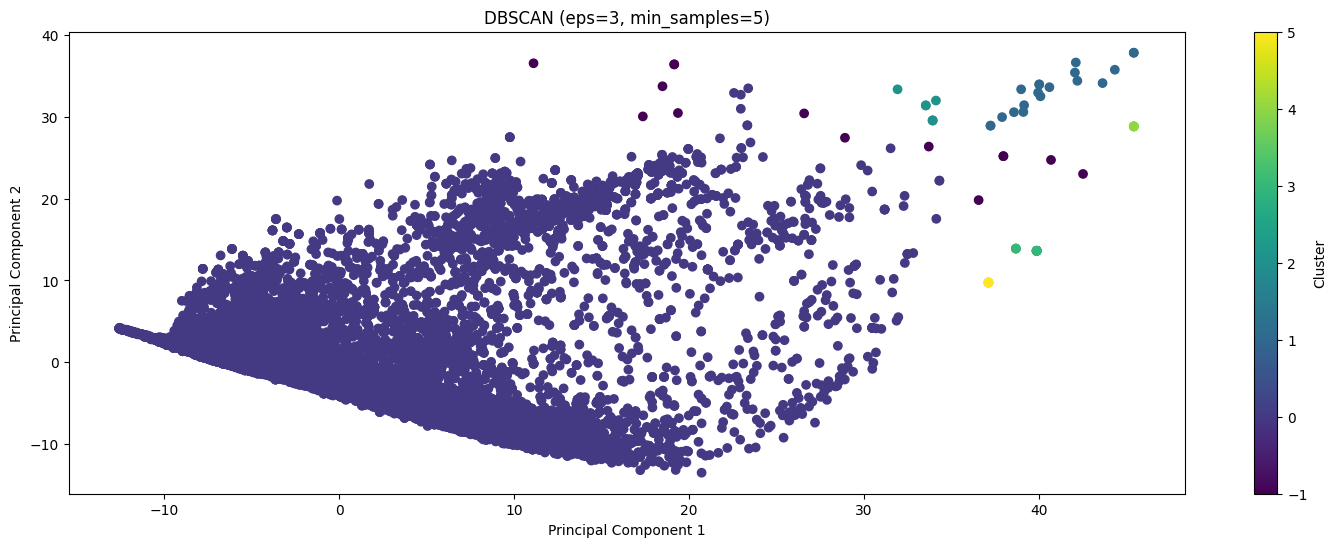

-------------------------------------------------------------
Parameters: eps=4, min_samples=5
Number of clusters: 4
Number of outliers: 2
Silhouette Score for DBSCAN (PCA): 0.6813697130116483
Davies-Bouldin Index for DBSCAN (PCA): 0.8142
Within-Cluster Sum of Squares (WCSS) for DBSCAN (PCA): 2470004.6464


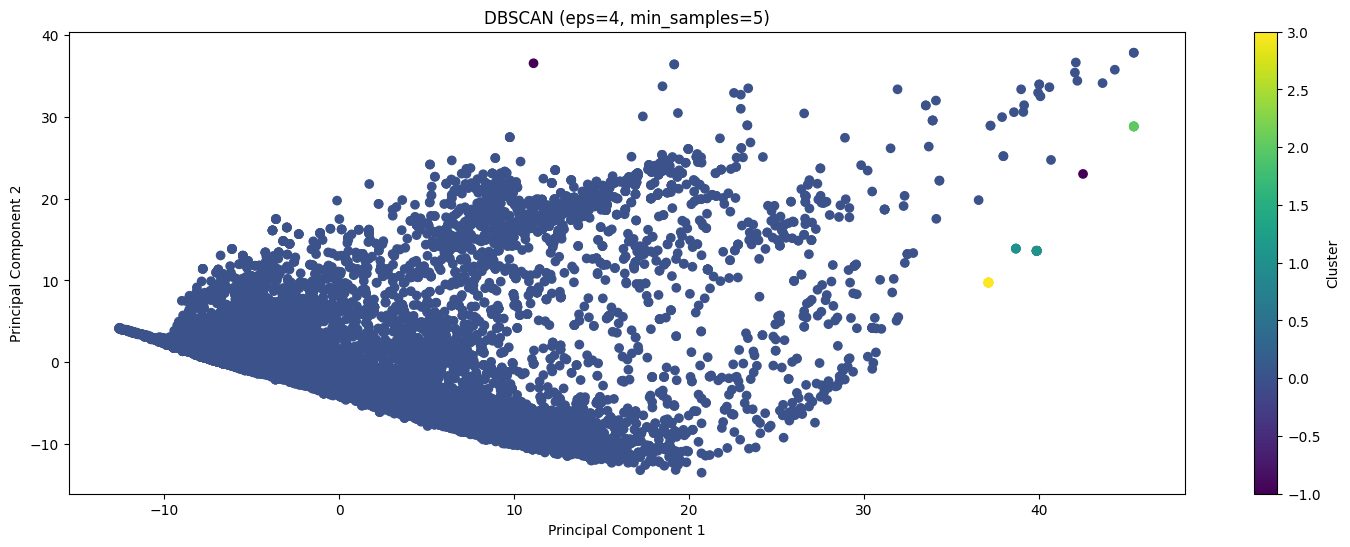

-------------------------------------------------------------
Parameters: eps=5, min_samples=5
Number of clusters: 3
Number of outliers: 2
Silhouette Score for DBSCAN (PCA): 0.6954848437246745
Davies-Bouldin Index for DBSCAN (PCA): 0.8439
Within-Cluster Sum of Squares (WCSS) for DBSCAN (PCA): 2470158.8499


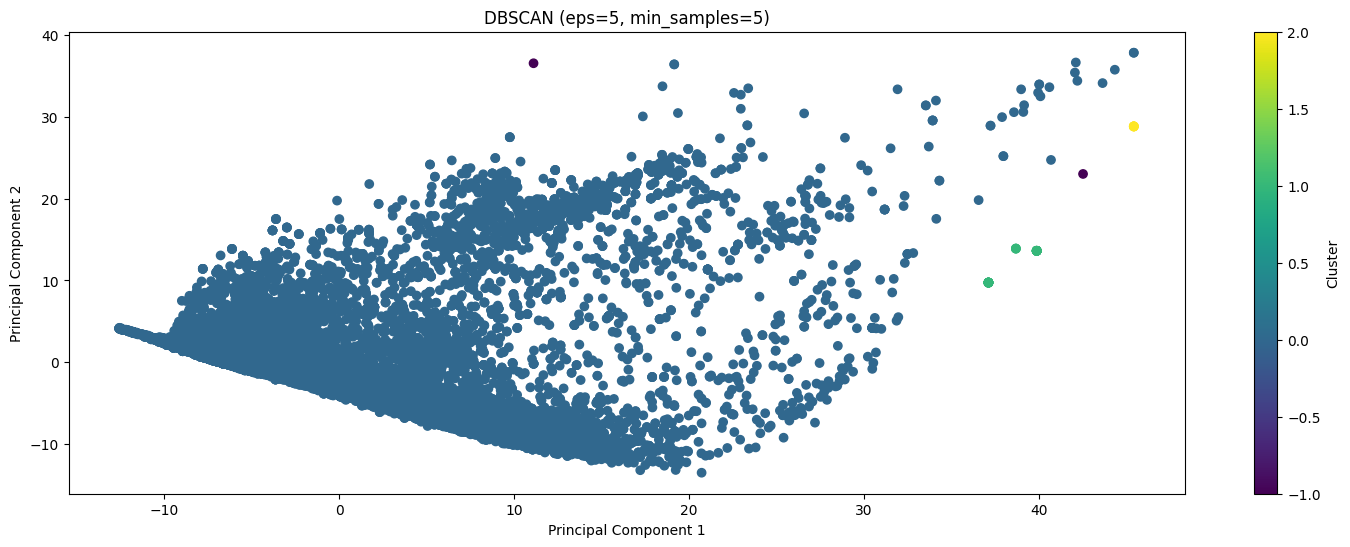

-------------------------------------------------------------
Parameters: eps=2, min_samples=10
Number of clusters: 3
Number of outliers: 86
Silhouette Score for DBSCAN (PCA): 0.684163026096665
Davies-Bouldin Index for DBSCAN (PCA): 0.7278
Within-Cluster Sum of Squares (WCSS) for DBSCAN (PCA): 2347871.2722


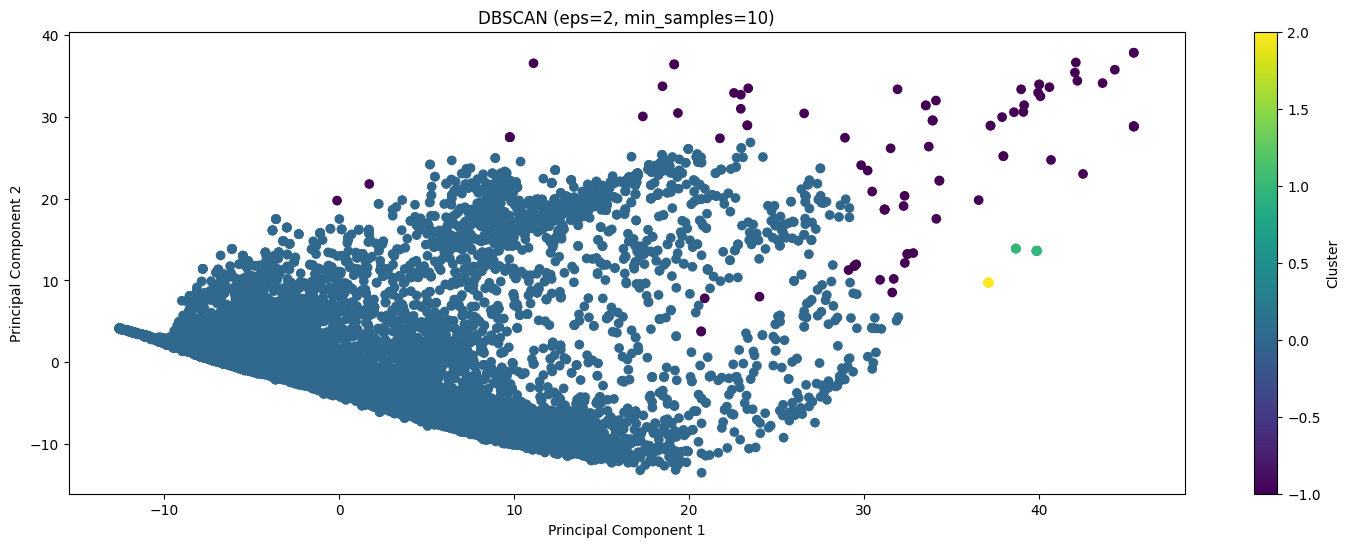

-------------------------------------------------------------
Parameters: eps=3, min_samples=10
Number of clusters: 4
Number of outliers: 39
Silhouette Score for DBSCAN (PCA): 0.6849551563012701
Davies-Bouldin Index for DBSCAN (PCA): 0.7844
Within-Cluster Sum of Squares (WCSS) for DBSCAN (PCA): 2371031.1545


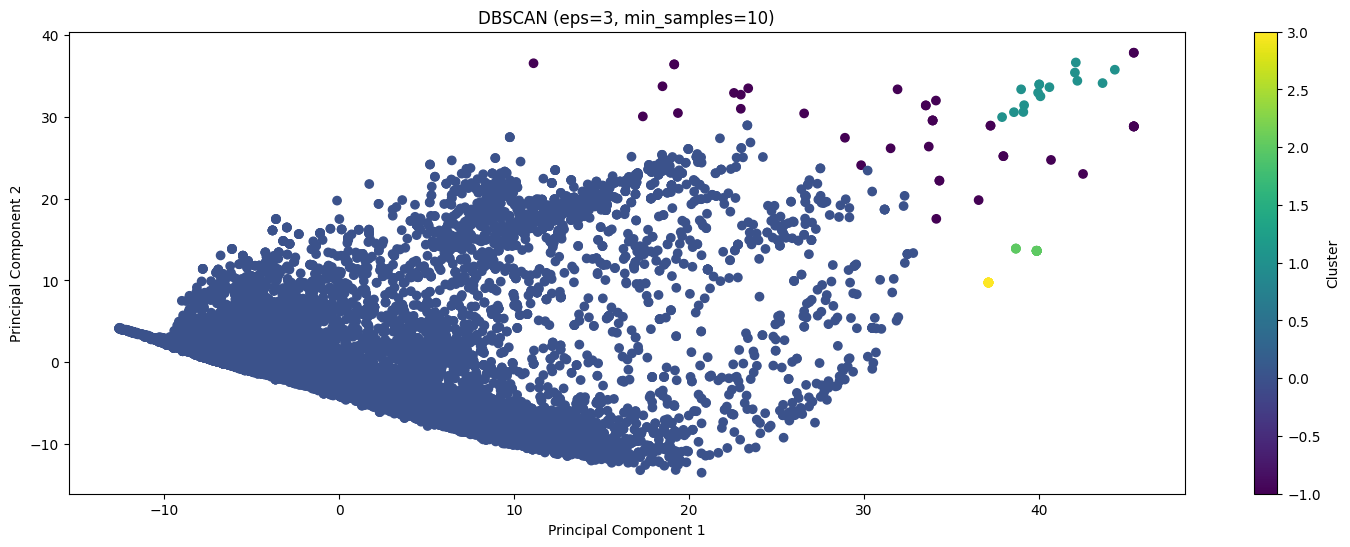

-------------------------------------------------------------
Parameters: eps=4, min_samples=10
Number of clusters: 4
Number of outliers: 16
Silhouette Score for DBSCAN (PCA): 0.6857891248234795
Davies-Bouldin Index for DBSCAN (PCA): 1.3122
Within-Cluster Sum of Squares (WCSS) for DBSCAN (PCA): 2385867.4836


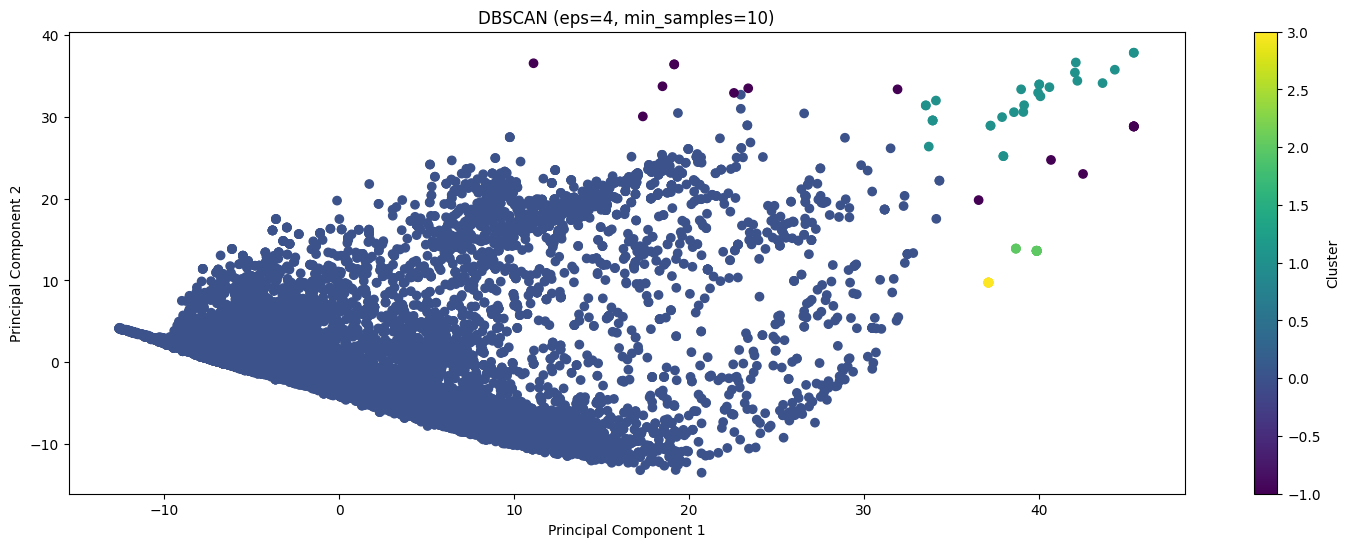

-------------------------------------------------------------
Parameters: eps=5, min_samples=10
Number of clusters: 2
Number of outliers: 8
Silhouette Score for DBSCAN (PCA): 0.7017256892439484
Davies-Bouldin Index for DBSCAN (PCA): 0.5367
Within-Cluster Sum of Squares (WCSS) for DBSCAN (PCA): 2468400.1907


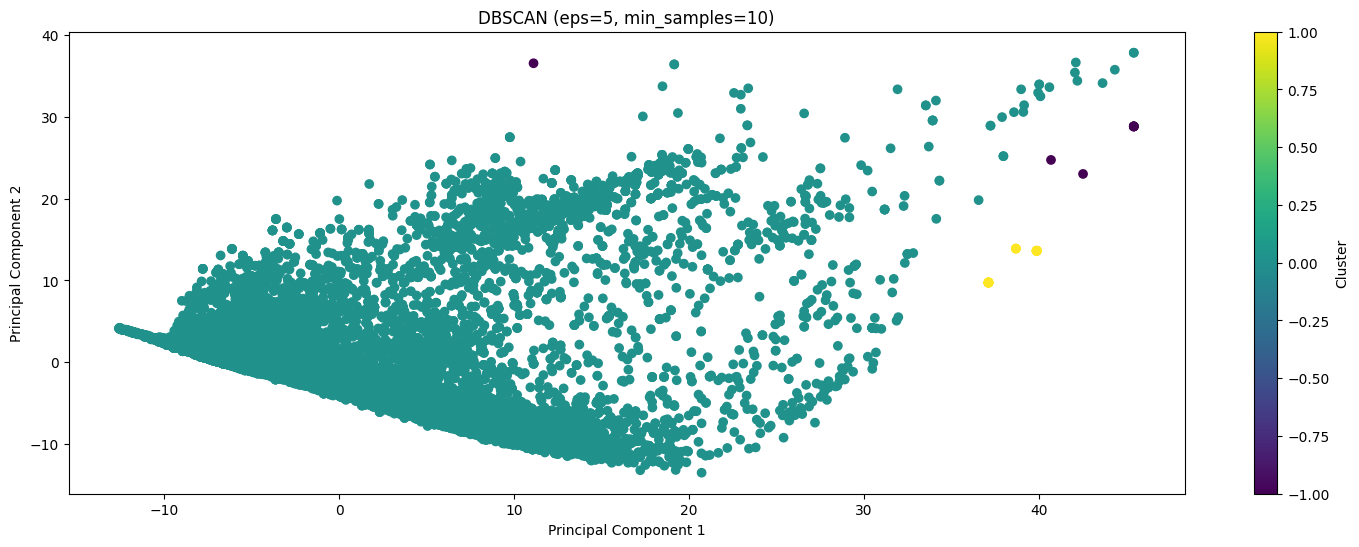

-------------------------------------------------------------
Parameters: eps=2, min_samples=20
Number of clusters: 3
Number of outliers: 272
Silhouette Score for DBSCAN (PCA): 0.5390183405661635
Davies-Bouldin Index for DBSCAN (PCA): 1.7636
Within-Cluster Sum of Squares (WCSS) for DBSCAN (PCA): 2183777.6440


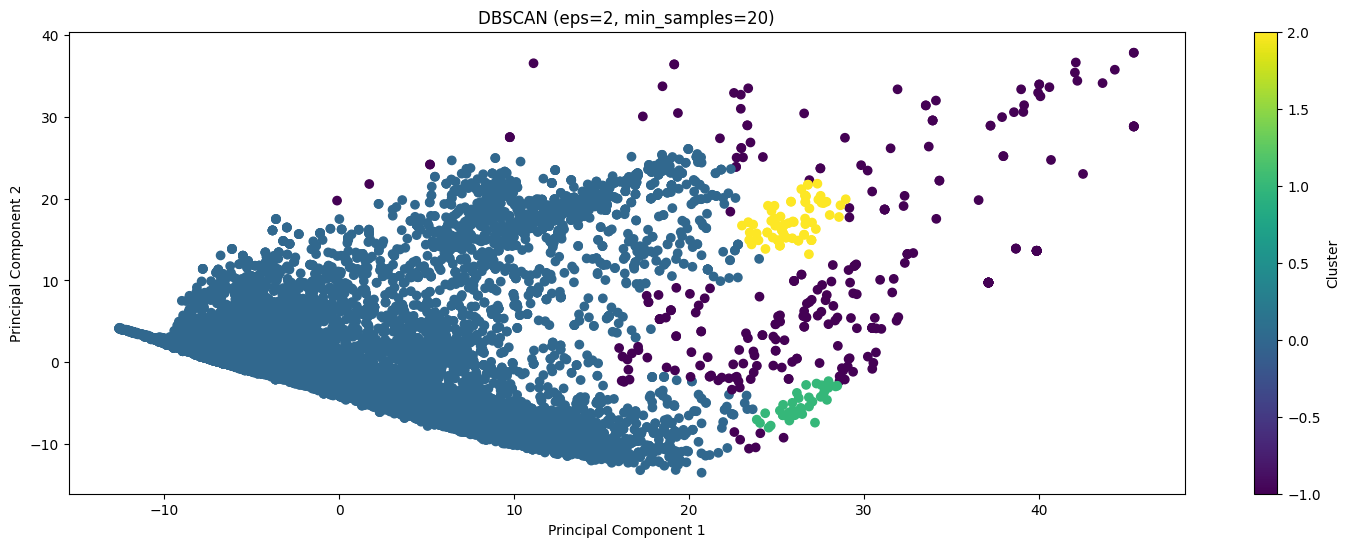

-------------------------------------------------------------
Parameters: eps=3, min_samples=20
Number of clusters: 1
Number of outliers: 93
Silhouette Score for DBSCAN (PCA): 0.7280981304324404
Davies-Bouldin Index for DBSCAN (PCA): 0.4452
Within-Cluster Sum of Squares (WCSS) for DBSCAN (PCA): 2367034.9719


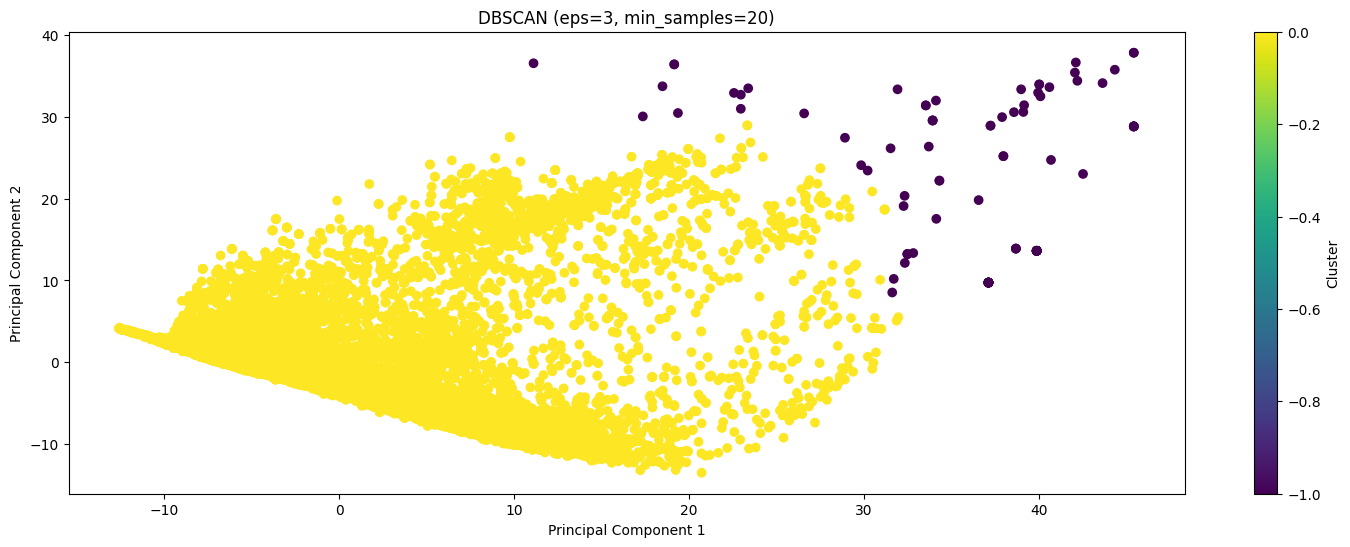

-------------------------------------------------------------
Parameters: eps=4, min_samples=20
Number of clusters: 1
Number of outliers: 80
Silhouette Score for DBSCAN (PCA): 0.7348694809803662
Davies-Bouldin Index for DBSCAN (PCA): 0.4330
Within-Cluster Sum of Squares (WCSS) for DBSCAN (PCA): 2382333.2131


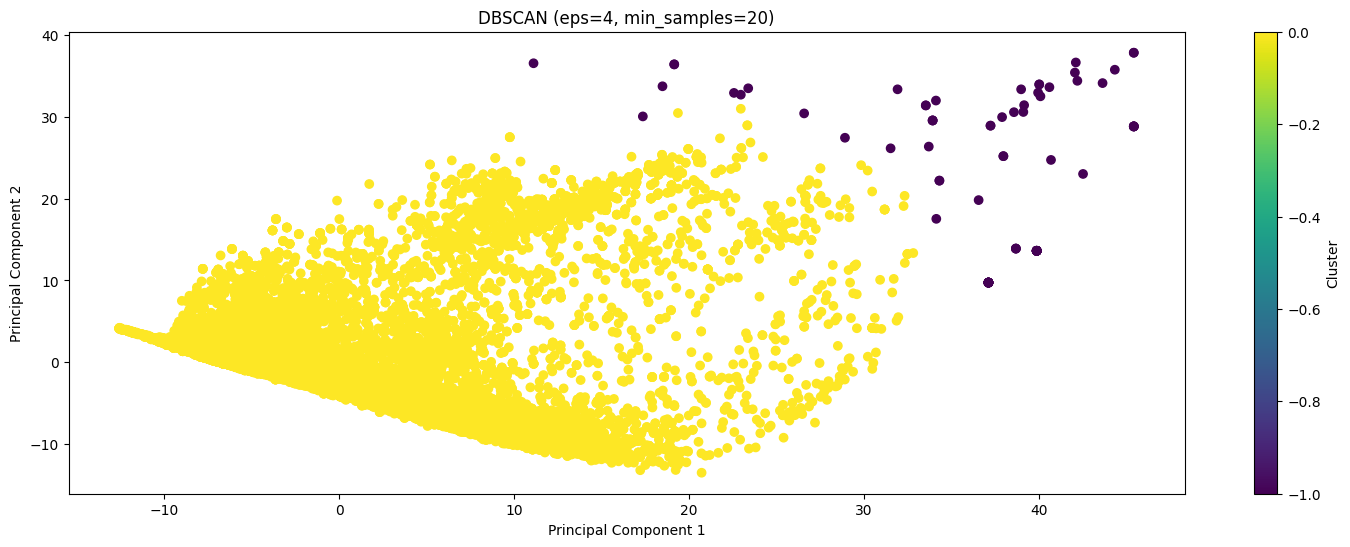

-------------------------------------------------------------
Parameters: eps=5, min_samples=20
Number of clusters: 3
Number of outliers: 19
Silhouette Score for DBSCAN (PCA): 0.7030675997158725
Davies-Bouldin Index for DBSCAN (PCA): 3.8115
Within-Cluster Sum of Squares (WCSS) for DBSCAN (PCA): 2393616.9001


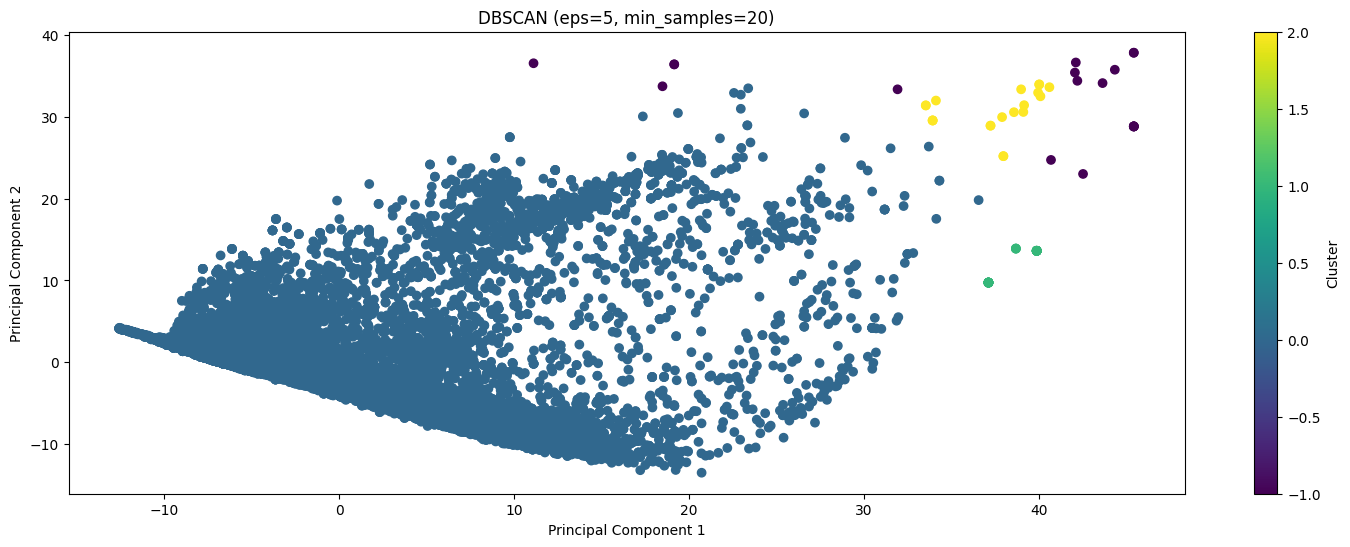

-------------------------------------------------------------


In [63]:
for params in param_combinations:
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    dbscan.fit(pca_train)
    labels = dbscan.labels_
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    print(f"Parameters: eps={params['eps']}, min_samples={params['min_samples']}")
    print(f"Number of clusters: {n_clusters}")
    print(f"Number of outliers: {n_noise}")

    silhouette_dbscan_pca = silhouette_score(pca_train, labels)
    print(f"Silhouette Score for DBSCAN (PCA): {silhouette_dbscan_pca}")

    dbi_dbscan_pca = davies_bouldin_score(pca_train, labels)
    print(f'Davies-Bouldin Index for DBSCAN (PCA): {dbi_dbscan_pca:.4f}')

    wcss_dbscan_pca = calculate_wcss(pca_train, labels)
    print(f'Within-Cluster Sum of Squares (WCSS) for DBSCAN (PCA): {wcss_dbscan_pca:.4f}')

    plt.figure(figsize=(18, 6))
    plt.scatter(pca_train[:, 0], pca_train[:, 1], c=labels, cmap='viridis', marker='o')
    plt.title(f"DBSCAN (eps={params['eps']}, min_samples={params['min_samples']})")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar(label="Cluster")
    plt.show()

    print("-------------------------------------------------------------")